<a href="https://colab.research.google.com/github/RenukaDhavala/SCT_E-DPIXLE_02/blob/main/SCT_E%26DPIX_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving pixell123.png to pixell123.png
✅ Image loaded: pixell123.png
🔐 Encrypted image saved!


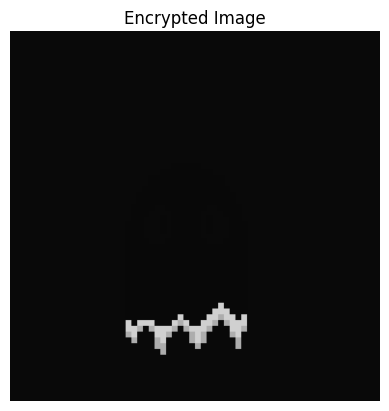

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

🔓 Decrypted image saved!


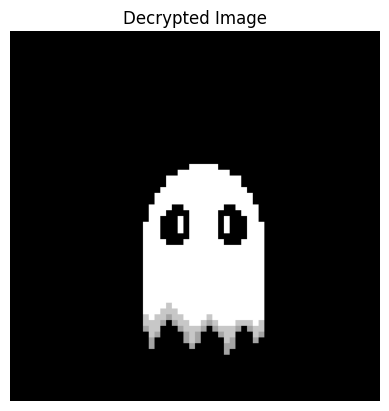

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
# ✅ STEP 1: Install required library
!pip install pillow

# ✅ STEP 2: Import required libraries
from PIL import Image
import numpy as np
from google.colab import files
import io
import matplotlib.pyplot as plt

# ✅ STEP 3: Upload image
uploaded = files.upload()

# ✅ STEP 4: Load the uploaded image
for file in uploaded.keys():
    img = Image.open(io.BytesIO(uploaded[file]))
    img = img.convert('RGB')  # Ensure it's RGB
    print("✅ Image loaded:", file)

# ✅ STEP 5: Encrypt function (with overflow fix)
def encrypt_image(img, key=9):
    arr = np.array(img).astype(np.int16)  # Prevent overflow
    flipped = np.flip(arr, axis=1)        # Flip horizontally
    encrypted = (flipped + key) % 256     # Apply key
    return Image.fromarray(encrypted.astype('uint8'))

# ✅ STEP 6: Decrypt function (reverse process)
def decrypt_image(img, key=9):
    arr = np.array(img).astype(np.int16)      # Prevent overflow
    unmodified = (arr - key) % 256            # Remove key
    original = np.flip(unmodified, axis=1)    # Flip back
    return Image.fromarray(original.astype('uint8'))

# ✅ STEP 7: Encrypt the image
enc_img = encrypt_image(img, key=9)
enc_img.save("encrypted_img.png")
print("🔐 Encrypted image saved!")

# ✅ STEP 8: Show encrypted image
plt.imshow(enc_img)
plt.title("Encrypted Image")
plt.axis('off')
plt.show()

# ✅ STEP 9: Download encrypted image
files.download("encrypted_img.png")

# ✅ STEP 10: Decrypt the image
dec_img = decrypt_image(enc_img, key=9)
dec_img.save("decrypted_img.png")
print("🔓 Decrypted image saved!")

# ✅ STEP 11: Show decrypted image
plt.imshow(dec_img)
plt.title("Decrypted Image")
plt.axis('off')
plt.show()

# ✅ STEP 12: Download decrypted image
files.download("decrypted_img.png")